In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

In [2]:
aapl_df = pd.read_csv('./data/aapl5yr.csv')

# cut out dates after 12/31/23 and before 1/1/22
aapl_trim = aapl_df.iloc[:-691]
aapl = aapl_trim.iloc[57:]

# clean up index and column names
aapl.reset_index(drop=True, inplace=True)
aapl.rename(columns={'Close/Last': 'AAPL_Close/Last', 'Volume':'AAPL_Volume', 'Open':'AAPL_Open', 'High':'AAPL_High', 'Low':'AAPL_Low'}, inplace=True)
aapl

/var/folders/6j/7jm_zl2s68l8kwj3mlfx8h6m0000gn/T/ipykernel_36844/4055490777.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl.rename(columns={'Close/Last': 'AAPL_Close/Last', 'Volume':'AAPL_Volume', 'Open':'AAPL_Open', 'High':'AAPL_High', 'Low':'AAPL_Low'}, inplace=True)


,Date,AAPL_Close/Last,AAPL_Volume,AAPL_Open,AAPL_High,AAPL_Low
0,01/12/2024,$185.92,40477780,$186.06,$186.74,$185.19
1,01/11/2024,$185.59,49128410,$186.54,$187.05,$183.62
2,01/10/2024,$186.19,46792910,$184.35,$186.40,$183.92
3,01/09/2024,$185.14,42841810,$183.92,$185.15,$182.73
4,01/08/2024,$185.56,59144470,$182.085,$185.60,$181.50
...,...,...,...,...,...,...
505,01/07/2022,$172.17,86709150,$172.89,$174.14,$171.03
506,01/06/2022,$172.00,96903960,$172.70,$175.30,$171.64
507,01/05/2022,$174.92,94537600,$179.61,$180.17,$174.64
508,01/04/2022,$179.70,99310440,$182.63,$182.94,$179.12


In [3]:
msft_df = pd.read_csv('./data/msft5yr.csv')

# cut out dates after 12/31/23 and before 1/1/22
msft_trim = msft_df.iloc[:-691]
msft = msft_trim.iloc[57:]

# clean up index and column names
msft.reset_index(drop=True,inplace=True)
msft.rename(columns={'Close/Last': 'MSFT_Close/Last', 'Volume':'MSFT_Volume', 'Open':'MSFT_Open', 'High':'MSFT_High', 'Low':'MSFT_Low'}, inplace=True)
msft

/var/folders/6j/7jm_zl2s68l8kwj3mlfx8h6m0000gn/T/ipykernel_36844/4144443977.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft.rename(columns={'Close/Last': 'MSFT_Close/Last', 'Volume':'MSFT_Volume', 'Open':'MSFT_Open', 'High':'MSFT_High', 'Low':'MSFT_Low'}, inplace=True)


,Date,MSFT_Close/Last,MSFT_Volume,MSFT_Open,MSFT_High,MSFT_Low
0,01/12/2024,$388.47,21661150,$385.49,$388.68,$384.65
1,01/11/2024,$384.63,27850850,$386.00,$390.68,$380.38
2,01/10/2024,$382.77,25514250,$376.37,$384.17,$376.32
3,01/09/2024,$375.79,20829950,$372.01,$375.99,$371.19
4,01/08/2024,$374.69,23133970,$369.30,$375.20,$369.01
...,...,...,...,...,...,...
505,01/07/2022,$314.04,32720020,$314.15,$316.50,$310.09
506,01/06/2022,$313.88,39646150,$313.15,$318.70,$311.49
507,01/05/2022,$316.38,40054330,$325.86,$326.07,$315.98
508,01/04/2022,$329.01,32674310,$334.83,$335.20,$326.12


In [4]:
meta_df = pd.read_csv('./data/meta5yr.csv')

# cut out dates after 12/31/23 and before 1/1/22
meta_trim = meta_df.iloc[:-691]
meta = meta_trim.iloc[57:]

# clean up index and column names
meta.reset_index(drop=True, inplace=True)
meta.rename(columns={'Close/Last': 'META_Close/Last', 'Volume':'META_Volume', 'Open':'META_Open', 'High':'META_High', 'Low':'META_Low'}, inplace=True)
meta

/var/folders/6j/7jm_zl2s68l8kwj3mlfx8h6m0000gn/T/ipykernel_36844/688649685.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta.rename(columns={'Close/Last': 'META_Close/Last', 'Volume':'META_Volume', 'Open':'META_Open', 'High':'META_High', 'Low':'META_Low'}, inplace=True)


,Date,META_Close/Last,META_Volume,META_Open,META_High,META_Low
0,01/12/2024,$374.49,19310050,$370.155,$377.06,$369.54
1,01/11/2024,$369.67,17205390,$372.13,$372.78,$362.93
2,01/10/2024,$370.47,22117210,$360.17,$372.94,$359.08
3,01/09/2024,$357.43,13463870,$356.40,$360.64,$355.36
4,01/08/2024,$358.66,13890220,$354.70,$358.98,$352.05
...,...,...,...,...,...,...
505,01/07/2022,$331.79,14722020,$332.74,$337.00,$328.8801
506,01/06/2022,$332.46,27962810,$322.82,$339.165,$322.72
507,01/05/2022,$324.17,20564520,$333.02,$335.76,$323.84
508,01/04/2022,$336.53,15997970,$339.95,$343.0854,$331.8711


In [5]:
ebay_df = pd.read_csv('./data/ebay5yr.csv')

# cut out dates after 12/31/23 and before 1/1/22
ebay_trim = ebay_df.iloc[:-691]
ebay = ebay_trim.iloc[57:]

# clean up index and column names
ebay.reset_index(drop = True, inplace = True)
ebay.rename(columns={'Close/Last': 'EBAY_Close/Last', 'Volume':'EBAY_Volume', 'Open':'EBAY_Open', 'High':'EBAY_High', 'Low':'EBAY_Low'}, inplace=True)
ebay

/var/folders/6j/7jm_zl2s68l8kwj3mlfx8h6m0000gn/T/ipykernel_36844/947491999.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ebay.rename(columns={'Close/Last': 'EBAY_Close/Last', 'Volume':'EBAY_Volume', 'Open':'EBAY_Open', 'High':'EBAY_High', 'Low':'EBAY_Low'}, inplace=True)


,Date,EBAY_Close/Last,EBAY_Volume,EBAY_Open,EBAY_High,EBAY_Low
0,01/12/2024,$41.21,5691049,$41.96,$42.07,$41.06
1,01/11/2024,$41.87,4618643,$42.51,$42.54,$41.49
2,01/10/2024,$42.56,3755274,$42.11,$42.705,$41.94
3,01/09/2024,$42.14,4937428,$42.29,$42.68,$41.96
4,01/08/2024,$42.84,4109427,$42.98,$42.98,$42.405
...,...,...,...,...,...,...
505,01/07/2022,$66.32,5000956,$66.73,$67.33,$66.28
506,01/06/2022,$66.81,8218382,$64.135,$67.49,$64.08
507,01/05/2022,$64.49,7440725,$64.87,$66.27,$64.46
508,01/04/2022,$65.14,7527336,$67.17,$67.42,$64.44


In [6]:
lenovo_df = pd.read_csv('./data/lnvgy5yr.csv')

# cut out dates after 12/31/23 and before 1/1/22
lenovo_trim = lenovo_df.iloc[:-691]
lenovo = lenovo_trim.iloc[57:]

# clean up index and column names
lenovo.reset_index(drop=True, inplace = True)
lenovo.rename(columns={'Close/Last': 'LNVGY_Close/Last', 'Volume':'LNVGY_Volume', 'Open':'LNVGY_Open', 'High':'LNVGY_High', 'Low':'LNVGY_Low'}, inplace=True)
lenovo

/var/folders/6j/7jm_zl2s68l8kwj3mlfx8h6m0000gn/T/ipykernel_36844/3372735776.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lenovo.rename(columns={'Close/Last': 'LNVGY_Close/Last', 'Volume':'LNVGY_Volume', 'Open':'LNVGY_Open', 'High':'LNVGY_High', 'Low':'LNVGY_Low'}, inplace=True)


,Date,LNVGY_Close/Last,LNVGY_Volume,LNVGY_Open,LNVGY_High,LNVGY_Low
0,01/12/2024,$27.0365,21076,$27.01,$27.1891,$27.01
1,01/11/2024,$26.93,20872,$26.59,$27.00,$26.59
2,01/10/2024,$26.59,28433,$26.46,$26.64,$26.02
3,01/09/2024,$26.99,19726,$27.38,$27.38,$26.90
4,01/08/2024,$26.27,27720,$25.91,$26.30,$25.91
...,...,...,...,...,...,...
505,01/07/2022,$23.18,12661,$23.00,$23.18,$22.98
506,01/06/2022,$22.89,16968,$22.18,$23.05,$22.18
507,01/05/2022,$23.10,102716,$22.97,$23.23,$22.97
508,01/04/2022,$22.90,27268,$22.83,$23.005,$22.79


In [7]:
# merge 4 other stocks onto apple data
aapl = aapl.merge(msft, on='Date', how='left')
aapl = aapl.merge(meta, on='Date', how='left')  
aapl = aapl.merge(ebay, on='Date', how='left')
aapl = aapl.merge(lenovo, on='Date', how='left')

# remove $ from data
for column in aapl.columns:
    if aapl[column].dtype == 'object':
        aapl[column] = aapl[column].str.replace('$','')
aapl = aapl.apply(pd.to_numeric, errors='ignore')

# put dates in proper chronological order
aapl = aapl.iloc[::-1].reset_index(drop=True)
aapl 

,Date,AAPL_Close/Last,AAPL_Volume,AAPL_Open,AAPL_High,AAPL_Low,MSFT_Close/Last,MSFT_Volume,MSFT_Open,MSFT_High,...,EBAY_Close/Last,EBAY_Volume,EBAY_Open,EBAY_High,EBAY_Low,LNVGY_Close/Last,LNVGY_Volume,LNVGY_Open,LNVGY_High,LNVGY_Low
0,01/03/2022,182.01,104701200,177.830,182.88,177.71,334.75,28918010,335.35,338.00,...,66.80,6685654,66.450,67.1169,65.660,23.2600,46417,23.51,23.5100,22.63
1,01/04/2022,179.70,99310440,182.630,182.94,179.12,329.01,32674310,334.83,335.20,...,65.14,7527336,67.170,67.4200,64.440,22.9000,27268,22.83,23.0050,22.79
2,01/05/2022,174.92,94537600,179.610,180.17,174.64,316.38,40054330,325.86,326.07,...,64.49,7440725,64.870,66.2700,64.460,23.1000,102716,22.97,23.2300,22.97
3,01/06/2022,172.00,96903960,172.700,175.30,171.64,313.88,39646150,313.15,318.70,...,66.81,8218382,64.135,67.4900,64.080,22.8900,16968,22.18,23.0500,22.18
4,01/07/2022,172.17,86709150,172.890,174.14,171.03,314.04,32720020,314.15,316.50,...,66.32,5000956,66.730,67.3300,66.280,23.1800,12661,23.00,23.1800,22.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,01/08/2024,185.56,59144470,182.085,185.60,181.50,374.69,23133970,369.30,375.20,...,42.84,4109427,42.980,42.9800,42.405,26.2700,27720,25.91,26.3000,25.91
506,01/09/2024,185.14,42841810,183.920,185.15,182.73,375.79,20829950,372.01,375.99,...,42.14,4937428,42.290,42.6800,41.960,26.9900,19726,27.38,27.3800,26.90
507,01/10/2024,186.19,46792910,184.350,186.40,183.92,382.77,25514250,376.37,384.17,...,42.56,3755274,42.110,42.7050,41.940,26.5900,28433,26.46,26.6400,26.02
508,01/11/2024,185.59,49128410,186.540,187.05,183.62,384.63,27850850,386.00,390.68,...,41.87,4618643,42.510,42.5400,41.490,26.9300,20872,26.59,27.0000,26.59


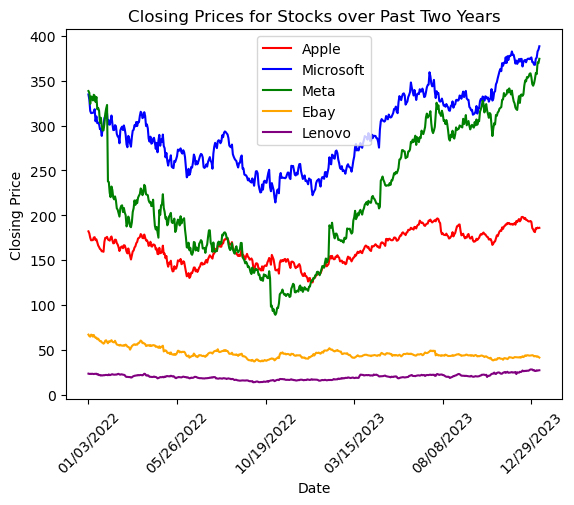

In [8]:
# gather closing price data on each stock
aapl_close = aapl['AAPL_Close/Last']
msft_close = aapl['MSFT_Close/Last']
meta_close = aapl['META_Close/Last']
ebay_close = aapl['EBAY_Close/Last']
lenovo_close = aapl['LNVGY_Close/Last']

# plot close price vs. date for each stock for visualization of trends
plt.plot(aapl['Date'], aapl_close, color = 'red', label = 'Apple')
plt.plot(aapl['Date'], msft_close, color = 'blue', label = 'Microsoft')
plt.plot(aapl['Date'], meta_close, color = 'green', label = 'Meta')
plt.plot(aapl['Date'], ebay_close, color = 'orange', label = 'Ebay')
plt.plot(aapl['Date'], lenovo_close, color = 'purple', label = 'Lenovo')

plt.legend()
plt.xticks(range(0,len(aapl['Date']), 100), rotation = 45)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Prices for Stocks over Past Two Years')
plt.show()

In [9]:
# create timestamp column to represent dates as numerical rather than object value
aapl['Timestamp'] = range(0,510)
# take out unneccessary date column now 
aapl = aapl.drop('Date', axis=1)

In [10]:
# scale all the features between 0-1 for training purposes 
scaler = MinMaxScaler(feature_range = (0,1))
aapl_scale = scaler.fit_transform(aapl)

In [11]:
# take in stock data to create train or test set
# set is made by using a sliding window approach of 10 days to predict the 11th day
# allows for stock prediction to be made for any day on which we have the previous 10 days of data on
def create_dataset(aapl, version):
    x = []
    y = []
    # if train set, then use 2022-2023 data
    if version == 'train':
        for i in range(10, 501):
            x.append(aapl[i-10:i, :])
            y.append(aapl[i, 0])
    # if test set, then use 2024 data
    else:
        for i in range(501, 510):
            x.append(aapl[i-10:i, :])
            y.append(aapl[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x, y

In [12]:
# make train and test groups and reshape
x_train, y_train = create_dataset(aapl_scale, 'train')
x_test, y_test = create_dataset(aapl_scale, 'test')
x_train = np.reshape(x_train, (x_train.shape[0], 10, 26))
x_test = np.reshape(x_test, (x_test.shape[0], 10, 26))

In [13]:
# create Sequential keras model that implements LSTM to predict future stock prices based on past data
# Dropout is added after each layer to prevent overfitting 
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1], 26)))
model.add(Dropout(0.2))
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=128))
model.add(Dropout(0.2))
# Add a Dense layer for output prediction
model.add(Dense(units=26, activation='relu'))

In [21]:
# prep model for predictions
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
8/8 [==============================] - 3s 30ms/step - loss: 0.0111
Epoch 2/100
8/8 [==============================] - 0s 43ms/step - loss: 0.0066
Epoch 3/100
8/8 [==============================] - 0s 45ms/step - loss: 0.0051
Epoch 4/100
8/8 [==============================] - 0s 45ms/step - loss: 0.0047
Epoch 5/100
8/8 [==============================] - 0s 45ms/step - loss: 0.0046
Epoch 6/100
8/8 [==============================] - 0s 45ms/step - loss: 0.0043
Epoch 7/100
8/8 [==============================] - 0s 45ms/step - loss: 0.0043
Epoch 8/100
8/8 [==============================] - 0s 45ms/step - loss: 0.0044
Epoch 9/100
8/8 [==============================] - 0s 45ms/step - loss: 0.0049
Epoch 10/100
8/8 [==============================] - 0s 45ms/step - loss: 0.0042
Epoch 11/100
8/8 [==============================] - 0s 45ms/step - loss: 0.0043
Epoch 12/100
8/8 [==============================] - 0s 45ms/step - loss: 0.0043
Epoch 13/100
8/8 [==============================]

In [22]:
# Evaluate the model
loss = model.evaluate(x_test, y_test)
print('Test Loss:', loss)

# Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  
stock_predictions = predictions[:, 0]
print(stock_predictions)

1/1 [==============================] - 1s 756ms/step - loss: 0.0079
Test Loss: 0.007897775620222092
1/1 [==============================] - 1s 615ms/step
[195.37021 193.22072 192.11514 190.07213 188.61832 188.17487 187.99113
 188.4565  189.07541]


In [16]:
# obtain true values for first two weeks of trading in 2024
true_prices = aapl.iloc[-9:, 0].values
print(true_prices)

[185.64 184.25 181.91 181.18 185.56 185.14 186.19 185.59 185.92]


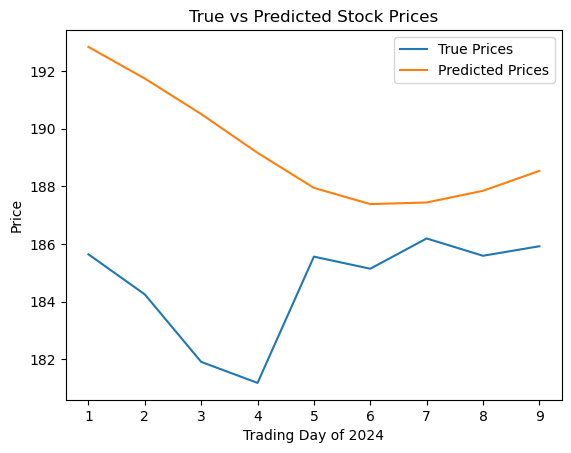

In [17]:
# plot true vs. predicted stock prices for apple
plt.plot(range(1,10), true_prices, label='True Prices')
plt.plot(range(1,10), stock_predictions, label='Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('True vs Predicted Stock Prices')
plt.xlabel("Trading Day of 2024")
plt.ylabel('Price')
plt.legend()
plt.show()

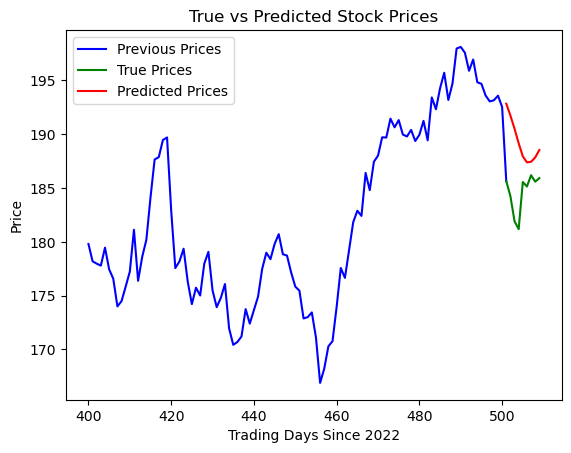

In [18]:
# plot true vs. predicted stock price, overlayed with previous data
plt.plot(range(400, len(aapl)-8), aapl.iloc[400:-8, 0], color='blue', label='Previous Prices')  # Entire DataFrame starting from row 400
plt.plot(range(len(aapl)-9, len(aapl)), true_prices, color='green', label='True Prices')  # True prices for last 9 rows
plt.plot(range(len(aapl)-9, len(aapl)), stock_predictions, color='red', label='Predicted Prices')  # Predicted prices for last 9 rows

plt.ylabel('Price')
plt.title('True vs Predicted Stock Prices')
plt.xlabel("Trading Days Since 2022")
plt.legend()
plt.show()

In [19]:
# calculate avg deviation from true and predicted price of a set of predictions
def avg_diff(true_prices, predicted_prices):
    differences = abs(true_prices - predicted_prices)
    average_difference = differences.mean()
    return average_difference

# calculate the max deviation from true and predicted price of a set of predictions
def max_deviation(true_prices, predicted_prices):
    differences = abs(true_prices - predicted_prices)
    max_dev = differences.max()
    return max_dev

In [20]:
# evaluate avg and max deviation from predictions
diff = avg_diff(true_prices, stock_predictions)
print(diff)
max_off = max_deviation(true_prices, stock_predictions)
print(max_off)

4.66604159884983
8.595416870117191
